## Lesson-01 Assignment

>

`各位同学大家好，欢迎各位开始学习我们的人工智能课程。这门课程假设大家不具备机器学习和人工智能的知识，但是希望大家具备初级的Python编程能力。根据往期同学的实际反馈，我们课程的完结之后 能力能够超过80%的计算机人工智能/深度学习方向的硕士生的能力。`

## 本次作业的内容

#### 1. 复现课堂代码

在本部分，你需要参照我们给大家的GitHub地址里边的课堂代码，结合课堂内容，复现内容。

In [2]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [26]:
import random

def adj():
    return random.choice('蓝色|好看的|小小的'.split('|')).strip()

adj()

'蓝色'

In [117]:
def adj_start():
    print([adj()+","+adj()])
    #加了None 什么作用？
    return random.choice([None,adj()+adj()])

adj_start()

['蓝色,蓝色']


In [119]:
adj_grammar='''
Adj* =>null|Adj Adj*
Adj=>蓝色的|好看的|小小的
'''

In [196]:
def grammar_show():
    grammar={}
    for line in adj_grammar.split('\n'):
        if not line.strip():continue
        exp,stmt=line.split('=>')
        grammar[exp.strip()]=[s.split() for s in stmt.split('|')]
    return grammar

grammar_show()

{'Adj': [['蓝色的'], ['好看的'], ['小小的']], 'Adj*': [['null'], ['Adj', 'Adj*']]}

In [203]:
grammar_show()['Adj*']

[['null'], ['Adj', 'Adj*']]

In [285]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [286]:
example_grammar = create_grammar(simple_grammar)

#### 2. 请回答以下问题

回答以下问题，并将问题发送至 mqgao@kaikeba.com中：
```
    2.1. what do you want to acquire in this course？
    2.2. what problems do you want to solve？
    2.3. what’s the advantages you have to finish you goal?
    2.4. what’s the disadvantages you need to overcome to finish you goal?
    2.5. How will you plan to study in this course period?
```

#### 3. 如何提交
代码 + 此 jupyter 相关，提交至自己的 github 中(**所以请务必把GitHub按照班主任要求录入在Trello中**)；
第2问，请提交至mqgao@kaikeba.com邮箱。
#### 4. 作业截止时间
此次作业截止时间为 2019.7.6日

#### 5. 完成以下问答和编程练习

>

## 基础理论部分

#### 0. Can you come up out 3 sceneraies which use AI methods? 

1.文本分类检索 2.图片查询 3.机器人客服

#### 1. How do we use Github; Why do we use Jupyter and Pycharm;

提交文件，版本控制。 Jupyter 实验环境 ，Pycharm 开发环境

#### 2. What's the Probability Model?

svm ,贝叶斯， 线性回归，逻辑回归

#### 3. Can you came up with some sceneraies at which we could use Probability Model?

1.精准推荐 2.用户画像 3. nlp中的词的频度计算

#### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?

Ans:

#### 5. What's the Language Model;

根据前面出现的单词计算后一个单词的模型

#### 6. Can you came up with some sceneraies at which we could use Language Model?


分词、词性标注、命名实体识别

#### 7. What's the 1-gram language model;

#### 8. What's the disadvantages and  of 1-gram language model;

#### 9. What't the 2-gram models;

## 编程实践部分

#### 1. 设计你自己的句子生成器

如何生成句子是一个很经典的问题，从1940s开始，图灵提出机器智能的时候，就使用的是人类能不能流畅和计算机进行对话。和计算机对话的一个前提是，计算机能够生成语言。

计算机如何能生成语言是一个经典但是又很复杂的问题。 我们课程上为大家介绍的是一种基于规则（Rule Based）的生成方法。该方法虽然提出的时间早，但是现在依然在很多地方能够大显身手。值得说明的是，现在很多很实用的算法，都是很久之前提出的，例如，二分查找提出与1940s, Dijstra算法提出于1960s 等等。

在著名的电视剧，电影《西部世界》中，这些机器人们语言生成的方法就是使用的SyntaxTree生成语言的方法。

> 
>

![WstWorld](https://timgsa.baidu.com/timg?image&quality=80&size=b10000_10000&sec=1561818705&di=95ca9ff2ff37fcb88ae47b82c7079feb&src=http://s7.sinaimg.cn/mw690/006BKUGwzy75VK46FMi66&690)

> 
>

在这一部分，需要各位同学首先定义自己的语言。 大家可以先想一个应用场景，然后在这个场景下，定义语法。例如：

在西部世界里，一个”人类“的语言可以定义为：
``` 
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 看看 | 找找 | 想找点
活动 = 乐子 | 玩的
"""
```

一个“接待员”的语言可以定义为
```
host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = 耍一耍 | 玩一玩
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？"""

```




请定义你自己的语法: 

In [176]:
teacher = """
teacher = 序号 作业 答案 
序号 = 1 | 2 | 3
作业  = 语文题 算术题 英文题  
答案 = 正确 | 错误
"""

student="""
student=自己 | 状态 | 
自己=我 | 俺 | 我们 
状态= 积极 | 踊跃 | 主动


"""

第一个语法：

In [172]:
#you_need_replace_this_with_name_you_given = '''
# you code here
#'''
def create_grammar_first(grammar_str, split='=', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [170]:
choice=random.choice

def generate(gram,target):
    if target not in gram:return target
    expaned=[generate(gram,t) for t in choice(gram[target])]
    return ''.join([e if e!='/n' else '\n' for e in expaned if e!='null'])


In [194]:
for i in range(4):
    print(generate(gram=create_grammar_first(student, split='='), target='student'))

踊跃


我们


第二个语法：

In [ ]:
#you_need_replace_this_with_name_you_given = '''
# you code here
#'''

def create_grammer_second():
    pass

TODO: 然后，使用自己之前定义的generate函数，使用此函数生成句子。

TODO: 然后，定义一个函数，generate_n，将generate扩展，使其能够生成n个句子:

In [10]:
def generate_n():
    # you code here 
    pass

>

#### 2. 使用新数据源完成语言模型的训练

按照我们上文中定义的`prob_2`函数，我们更换一个文本数据源，获得新的Language Model:

1. 下载文本数据集（你可以在以下数据集中任选一个，也可以两个都使用）
    + 可选数据集1，保险行业问询对话集： https://github.com/Computing-Intelligence/insuranceqa-corpus-zh/raw/release/corpus/pool/train.txt.gz
    + 可选数据集2：豆瓣评论数据集：https://github.com/Computing-Intelligence/datasource/raw/master/movie_comments.csv
2. 修改代码，获得新的**2-gram**语言模型
    + 进行文本清洗，获得所有的纯文本
    + 将这些文本进行切词
    + 送入之前定义的语言模型中，判断文本的合理程度

In [205]:
filename='movie_comments.csv'

In [207]:
import pandas as pd

In [209]:
content = pd.read_csv(filename, encoding='utf-8')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [211]:
content.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [212]:
articles = content['comment'].tolist()

In [236]:
articles

['吴京意淫到了脑残的地步，看了恶心想吐',
 '首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮番上场，视物理逻辑于不顾，不得不说有钱真好，随意胡闹',
 '吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋律，为了煽情而煽情，让人觉得他是个大做作、大谎言家。（7.29更新）片子整体不如湄公河行动，1.整体不够流畅，编剧有毒，台词尴尬；2.刻意做作的主旋律煽情显得如此不合时宜而又多余。',
 '凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。',
 '中二得很',
 '“犯我中华者，虽远必诛”，吴京比这句话还要意淫一百倍。',
 '脑子是个好东西，希望编剧们都能有。',
 '三星半，实打实的7分。第一集在爱国主旋律内部做着各种置换与较劲，但第二集才真正显露吴京的野心，他终于抛弃李忠志了，新增外来班底让硬件实力有机会和国际接轨，开篇水下长镜头和诸如铁丝网拦截RPG弹头的细节设计都让国产动作片重新封顶，在理念上，它甚至做到《绣春刀2》最想做到的那部分。',
 '开篇长镜头惊险大气引人入胜 结合了水平不俗的快剪下实打实的真刀真枪 让人不禁热血沸腾 特别弹簧床架挡炸弹 空手接碎玻璃 弹匣割喉等帅得飞起！就算前半段铺垫节奏散漫主角光环开太大等也不怕 作为一个中国人 两个小时弥漫着中国强大得不可侵犯的氛围 还是让那颗民族自豪心砰砰砰跳个不停。',
 '15/100吴京的冷峰在这部里即像成龙，又像杰森斯坦森，但体制外的同类型电影，主角总是代表个人，无能的政府需要求助于这些英雄才能解决难题，体现的是个人的价值，所以主旋律照抄这种模式实际上是有问题的。我们以前嘲笑个人英雄主义，却没想到捆绑爱国主义的全能战士更加难以下咽。',
 '犯我中华者虽远必诛，是有多无脑才信这句话。',
 '这部戏让人看的热血沸腾，对吴京路转粉，最后的彩蛋，让我们没有理由不期待下一部。',
 '假嗨，特别恶心的电影。',
 '有几处情节设置过于尴尬，彰显国家自豪感的部分稍显突兀。',
 '就是一部爽片，打戏挺燃，但是故事一般。达康书记不合适这个角色，赵东来倒是很合适。张瀚太太太违和了，分分钟穿越回偶像剧。',
 '赵东来：达康书记，我们接到在非洲卧底的冷锋报告，丁义珍现在非洲，我们请求抓捕。李达康：东来，这件事先不

In [239]:
len(articles)

261497

In [222]:
import re

In [249]:
def token(string):
    # we will learn the regular expression next course.
    #a=re.findall('\w+', string)
    #print(a)
    return re.findall('\w+', string)

In [254]:
articles_clean = [''.join(token(str(a)))for a in articles]

In [255]:
articles_clean


['吴京意淫到了脑残的地步看了恶心想吐',
 '首映礼看的太恐怖了这个电影不讲道理的完全就是吴京在实现他这个小粉红的英雄梦各种装备轮番上场视物理逻辑于不顾不得不说有钱真好随意胡闹',
 '吴京的炒作水平不输冯小刚但小刚至少不会用主旋律来炒作吴京让人看了不舒服为了主旋律而主旋律为了煽情而煽情让人觉得他是个大做作大谎言家729更新片子整体不如湄公河行动1整体不够流畅编剧有毒台词尴尬2刻意做作的主旋律煽情显得如此不合时宜而又多余',
 '凭良心说好看到不像战狼1的续集完虐湄公河行动',
 '中二得很',
 '犯我中华者虽远必诛吴京比这句话还要意淫一百倍',
 '脑子是个好东西希望编剧们都能有',
 '三星半实打实的7分第一集在爱国主旋律内部做着各种置换与较劲但第二集才真正显露吴京的野心他终于抛弃李忠志了新增外来班底让硬件实力有机会和国际接轨开篇水下长镜头和诸如铁丝网拦截RPG弹头的细节设计都让国产动作片重新封顶在理念上它甚至做到绣春刀2最想做到的那部分',
 '开篇长镜头惊险大气引人入胜结合了水平不俗的快剪下实打实的真刀真枪让人不禁热血沸腾特别弹簧床架挡炸弹空手接碎玻璃弹匣割喉等帅得飞起就算前半段铺垫节奏散漫主角光环开太大等也不怕作为一个中国人两个小时弥漫着中国强大得不可侵犯的氛围还是让那颗民族自豪心砰砰砰跳个不停',
 '15100吴京的冷峰在这部里即像成龙又像杰森斯坦森但体制外的同类型电影主角总是代表个人无能的政府需要求助于这些英雄才能解决难题体现的是个人的价值所以主旋律照抄这种模式实际上是有问题的我们以前嘲笑个人英雄主义却没想到捆绑爱国主义的全能战士更加难以下咽',
 '犯我中华者虽远必诛是有多无脑才信这句话',
 '这部戏让人看的热血沸腾对吴京路转粉最后的彩蛋让我们没有理由不期待下一部',
 '假嗨特别恶心的电影',
 '有几处情节设置过于尴尬彰显国家自豪感的部分稍显突兀',
 '就是一部爽片打戏挺燃但是故事一般达康书记不合适这个角色赵东来倒是很合适张瀚太太太违和了分分钟穿越回偶像剧',
 '赵东来达康书记我们接到在非洲卧底的冷锋报告丁义珍现在非洲我们请求抓捕李达康东来这件事先不要声张特别是别让省厅知道就你和我一起去非洲加上冷锋同志三人逮捕丁义珍这次行就叫战狼2吧',
 '下一部拍喜剧吧整个片子真感觉挺搞笑的',
 '战狼2里吴京这么能打他打得过徐晓冬么',
 '

In [257]:
with open('article_9k.txt', 'w',encoding="utf-8") as f:
    for a in articles_clean:
        f.write(a + '\n')

In [215]:
from collections import Counter

In [217]:
import jieba

In [241]:
with_jieba_cut = Counter(jieba.cut(articles[400]))

In [242]:
with_jieba_cut

Counter({'一股': 1,
         '不': 1,
         '不好': 1,
         '为什么': 1,
         '了': 1,
         '什么': 1,
         '你们': 1,
         '只是': 1,
         '吗': 1,
         '吸烟': 1,
         '啪': 1,
         '啪啪': 1,
         '图书馆': 1,
         '在': 1,
         '堕胎': 1,
         '堕落': 1,
         '多人': 1,
         '审美': 1,
         '就': 1,
         '差评': 1,
         '情书': 1,
         '懂': 1,
         '我': 1,
         '日本': 1,
         '是': 1,
         '暗恋': 1,
         '有': 1,
         '校园': 1,
         '没有': 2,
         '清流': 1,
         '的': 3,
         '直接': 1,
         '符合': 1,
         '简直': 1,
         '简简单单': 1,
         '给': 1,
         '觉得': 1,
         '说': 1,
         '质量': 1,
         '那么': 1,
         '都': 1,
         '里面': 1,
         '青春片': 2,
         '高': 1,
         '！': 2,
         '，': 2,
         '？': 2})

In [243]:
with_jieba_cut.most_common()[:50]

[('的', 3),
 ('青春片', 2),
 ('！', 2),
 ('没有', 2),
 ('，', 2),
 ('？', 2),
 ('我', 1),
 ('觉得', 1),
 ('简直', 1),
 ('是', 1),
 ('校园', 1),
 ('一股', 1),
 ('清流', 1),
 ('不', 1),
 ('懂', 1),
 ('为什么', 1),
 ('那么', 1),
 ('多人', 1),
 ('给', 1),
 ('差评', 1),
 ('堕胎', 1),
 ('堕落', 1),
 ('吸烟', 1),
 ('只是', 1),
 ('简简单单', 1),
 ('暗恋', 1),
 ('有', 1),
 ('什么', 1),
 ('不好', 1),
 ('吗', 1),
 ('都', 1),
 ('说', 1),
 ('日本', 1),
 ('质量', 1),
 ('高', 1),
 ('情书', 1),
 ('里面', 1),
 ('在', 1),
 ('图书馆', 1),
 ('直接', 1),
 ('啪啪', 1),
 ('啪', 1),
 ('就', 1),
 ('符合', 1),
 ('你们', 1),
 ('审美', 1),
 ('了', 1)]

In [248]:
''.join(token(articles[400]))

'我觉得简直是校园青春片的一股清流不懂为什么那么多人给差评没有堕胎没有堕落吸烟只是简简单单的暗恋有什么不好吗都说日本青春片质量高情书里面在图书馆直接啪啪啪就符合你们的审美了'

In [259]:
def cut(string): return list(jieba.cut(string))

In [260]:
!ls

Assignment-01.ipynb
article_9k.txt
assignment-01-optional-pattern-match.ipynb
movie_comments.csv
train.txt
work_1.ipynb


In [261]:
def cut(string): return list(jieba.cut(string))

In [262]:
TOKEN = []

In [264]:
for i, line in enumerate((open('article_9k.txt',encoding="utf-8"))):
    if i % 100 == 0: print(i)
    
    # replace 10000 with a big number when you do your homework. 
    
    if i > 10000: break    
    TOKEN += cut(line)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [265]:
words_count = Counter(TOKEN)

In [266]:
words_count.most_common(100)

[('的', 16095),
 ('\n', 10001),
 ('了', 6113),
 ('是', 3932),
 ('我', 2677),
 ('都', 2243),
 ('和', 1837),
 ('也', 1741),
 ('在', 1718),
 ('看', 1603),
 ('电影', 1553),
 ('不', 1551),
 ('有', 1546),
 ('很', 1466),
 ('就', 1460),
 ('人', 1337),
 ('好', 1156),
 ('啊', 1052),
 ('你', 1002),
 ('但', 973),
 ('还', 952),
 ('这', 951),
 ('一个', 908),
 ('还是', 901),
 ('让', 770),
 ('没有', 770),
 ('就是', 726),
 ('剧情', 686),
 ('太', 681),
 ('故事', 673),
 ('说', 662),
 ('上', 653),
 ('到', 651),
 ('得', 650),
 ('又', 618),
 ('给', 618),
 ('没', 612),
 ('他', 600),
 ('最后', 598),
 ('一部', 579),
 ('对', 575),
 ('能', 560),
 ('被', 555),
 ('多', 549),
 ('吧', 515),
 ('最', 512),
 ('好看', 511),
 ('这个', 507),
 ('要', 496),
 ('可以', 483),
 ('拍', 481),
 ('不错', 478),
 ('喜欢', 477),
 ('真的', 473),
 ('不是', 469),
 ('什么', 469),
 ('动作', 460),
 ('觉得', 453),
 ('与', 448),
 ('把', 440),
 ('戏', 438),
 ('感觉', 415),
 ('演技', 409),
 ('里', 407),
 ('导演', 407),
 ('这么', 405),
 ('自己', 396),
 ('去', 393),
 ('更', 393),
 ('大', 389),
 ('想', 388),
 ('比', 382),
 ('打', 377),
 ('片'

In [267]:
frequiences = [f for w, f in words_count.most_common(100)]

In [268]:
x = [i for i in range(100)]

In [269]:
%matplotlib inline

In [270]:
import matplotlib.pyplot as plt

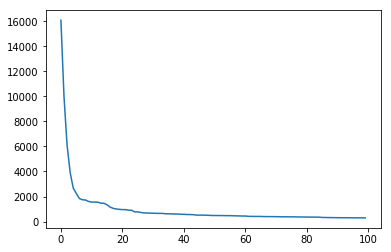

In [271]:
plt.plot(x, frequiences)

In [272]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [273]:
prob_1('导演')

0.0015558044502887987

In [275]:
TOKEN = [str(t) for t in TOKEN]

In [276]:
TOKEN[:10]

['吴京', '意淫', '到', '了', '脑残', '的', '地步', '看', '了', '恶心']

In [277]:
TOKEN = [str(t) for t in TOKEN]

In [279]:
words_count = Counter(TOKEN)

In [280]:
words_count

Counter({'吴京': 220,
         '意淫': 39,
         '到': 651,
         '了': 6113,
         '脑残': 11,
         '的': 16095,
         '地步': 20,
         '看': 1603,
         '恶心': 45,
         '想': 388,
         '吐': 57,
         '\n': 10001,
         '首映礼': 6,
         '太': 681,
         '恐怖': 20,
         '这个': 507,
         '电影': 1553,
         '不讲道理': 1,
         '完全': 255,
         '就是': 726,
         '在': 1718,
         '实现': 13,
         '他': 600,
         '小': 321,
         '粉红': 4,
         '英雄': 265,
         '梦': 44,
         '各种': 236,
         '装备': 24,
         '轮番': 7,
         '上场': 2,
         '视': 1,
         '物理': 9,
         '逻辑': 98,
         '于': 93,
         '不顾': 2,
         '不得不': 49,
         '说': 662,
         '有钱': 15,
         '真': 250,
         '好': 1156,
         '随意': 8,
         '胡闹': 4,
         '炒作': 6,
         '水平': 61,
         '不输': 6,
         '冯小刚': 3,
         '但小刚': 1,
         '至少': 54,
         '不会': 135,
         '用': 207,
         '主旋律': 138,
    

In [281]:
def prob_1(word): return words_count[word] / len(TOKEN)

In [288]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN)

In [283]:
def get_probablity(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
    
    return sentence_pro

In [289]:
for sen in [generate(gram=example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 一个蓝色的蓝色的蓝色的女人看见一个小小的小小的小猫 with Prb: 9.73480378846451e-66
sentence: 这个篮球听着一个篮球 with Prb: 8.162120479440245e-28
sentence: 这个好看的小小的蓝色的篮球看着一个好看的蓝色的小小的桌子 with Prb: 1.4224873169033072e-76
sentence: 这个女人看着一个篮球 with Prb: 2.135218879542048e-22
sentence: 这个女人听着这个小小的好看的小猫 with Prb: 4.559159663552799e-44
sentence: 一个好看的好看的桌子看着一个小猫 with Prb: 4.559159663552799e-44
sentence: 一个篮球看见这个小小的女人 with Prb: 8.162120479440245e-28
sentence: 这个好看的蓝色的女人看见一个桌子 with Prb: 4.559159663552799e-44
sentence: 一个桌子看着这个女人 with Prb: 2.135218879542048e-22
sentence: 一个篮球看着一个小小的好看的蓝色的桌子 with Prb: 1.7427913744797608e-49


#### 3. 获得最优质的的语言

当我们能够生成随机的语言并且能判断之后，我们就可以生成更加合理的语言了。请定义 generate_best 函数，该函数输入一个语法 + 语言模型，能够生成**n**个句子，并能选择一个最合理的句子: 



提示，要实现这个函数，你需要Python的sorted函数

In [13]:
sorted([1, 3, 5, 2])

[1, 2, 3, 5]

这个函数接受一个参数key，这个参数接受一个函数作为输入，例如

In [15]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[0])

[(1, 4), (2, 5), (4, 4), (5, 0)]

能够让list按照第0个元素进行排序.

In [16]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1])

[(5, 0), (1, 4), (4, 4), (2, 5)]

能够让list按照第1个元素进行排序.

In [17]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1], reverse=True)

[(2, 5), (1, 4), (4, 4), (5, 0)]

能够让list按照第1个元素进行排序, 但是是递减的顺序。

>

In [20]:
def generate_best(): # you code here
    pass

好了，现在我们实现了自己的第一个AI模型，这个模型能够生成比较接近于人类的语言。

>

Q: 这个模型有什么问题？ 你准备如何提升？ 

Ans:

>

##### 以下内容为可选部分，对于绝大多数同学，能完成以上的项目已经很优秀了，下边的内容如果你还有精力可以试试，但不是必须的。

#### 4. (Optional) 完成基于Pattern Match的语句问答
> 我们的GitHub仓库中，有一个assignment-01-optional-pattern-match，这个难度较大，感兴趣的同学可以挑战一下。


#### 5. (Optional) 完成阿兰图灵机器智能原始论文的阅读
1. 请阅读阿兰图灵关于机器智能的原始论文：https://github.com/Computing-Intelligence/References/blob/master/AI%20%26%20Machine%20Learning/Computer%20Machinery%20and%20Intelligence.pdf 
2. 并按照GitHub仓库中的论文阅读模板，填写完毕后发送给我: mqgao@kaikeba.com 谢谢

> 

各位同学，我们已经完成了自己的第一个AI模型，大家对人工智能可能已经有了一些感觉，人工智能的核心就是，我们如何设计一个模型、程序，在外部的输入变化的时候，我们的程序不变，依然能够解决问题。人工智能是一个很大的领域，目前大家所熟知的深度学习只是其中一小部分，之后也肯定会有更多的方法提出来，但是大家知道人工智能的目标，就知道了之后进步的方向。

然后，希望大家对AI不要有恐惧感，这个并不难，大家加油！

>

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1561828422005&di=48d19c16afb6acc9180183a6116088ac&imgtype=0&src=http%3A%2F%2Fb-ssl.duitang.com%2Fuploads%2Fitem%2F201807%2F28%2F20180728150843_BECNF.thumb.224_0.jpeg)